# <center>Welcome to Supervised Learning</center>
## <center>Part 3: Evaluation metrics in supervised machine learning</center>
## <center>Instructor: Andras Zsom</center>
### <center>https://github.com/azsom/Supervised-Learning<center>

## The topic of the course series: supervised Machine Learning (ML)
- how to build an ML pipeline from beginning to deployment
- we assume you already performed data cleaning
- this is the first course out of 6 courses
    - Part 1: Introduction to machine learning and the bias-variance tradeoff
    - Part 2: How to prepare your data for supervised machine learning
    - **Part 3: Evaluation metrics in supervised machine learning**
    - Part 4: Non-linear supervised machine learning algorithms
    - Part 5: Missing data in supervised ML
    - Part 6: Interpretability
- you can complete the courses in sequence or complete individual courses based on your interest

### Structured data
| X|feature_1|feature_2|...|feature_j|...|feature_m|<font color='red'>Y</font>|
|-|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|__data_point_1__|x_11|x_12|...|x_1j|...|x_1m|__<font color='red'>y_1</font>__|
|__data_point_2__|x_21|x_22|...|x_2j|...|x_2m|__<font color='red'>y_2</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_i__|x_i1|x_i2|...|x_ij|...|x_im|__<font color='red'>y_i</font>__|
|__...__|...|...|...|...|...|...|__<font color='red'>...</font>__|
|__data_point_n__|x_n1|x_n2|...|x_nj|...|x_nm|__<font color='red'>y_n</font>__|

We focus on the target variable (y) in this course.

### Learning objectives of this course
- Describe the elements of the confusion matrix
- Describe metrics derived from the confusion matrix such as accuracy, precision, recall, and the f_beta score
- Summarize what the ROC and precision-recall curves and AUC are
- Review the logloss metric and its properties
- Outline metrics often used in regression (MSE, RMSE, MAE, R2 score)
- Calculate the value of each metric given a set’s target variable and predictions from an ML model
- Calculate the baseline of each metric given a set’s target variable
- Choose an appropriate evaluation metric given your ML problem


# Module 1: Hard predictions in classification
### Learning objectives of this module:
- Describe the elements of the confusion matrix
- Describe metrics derived from the confusion matrix such as accuracy, precision, recall, and the f_beta score
- Calculate the value of each metric given a set’s target variable and predictions from an ML model
- Calculate the baseline of each metric given a set’s target variable

## Let's start
- decide what metric we will use to evaluate the supervised ML model 
   - this is necessary even before we train the model
   - we need to know what single number metric we will use to compare models and to select the best one
- sklearn classifiers have two methods to return predictions
   - .predict_proba which returns the probability that the point belongs to each class with shape (n_samples, n_classes)
   - .predict which returns the predicted class for each point with shape (n_samples)

### .predict_proba vs. .predict

`y_true = [1 0 1 1 0] # the true labels`

`pred_probs = 
[[0.02796171 0.97203829]
 [0.89682444 0.10317556]
 [0.50104129 0.49895871]
 [0.13713222 0.86286778]
 [0.95707434 0.04292566]] # predicted probabilities show the model's confidence`
 
 `y_pred = [1 0 0 1 0] # predicted class`
 - pred_probs
    - first column is the probability that the point belongs to class 0
    - second column is the probability that the point belings to class 1
    - the rows sum to 1
 - y_pred
    - 0 if class 0 probability is equal or larger than 50% (or equivalently if class 1 probability is less than 50%)
    - 1 if class 0 probability is less than 50% (or equivalently of class 1 probability is equal or larger than 50%)

### How to transform predicted probabilities to predicted class?

In [14]:
import numpy as np
y_true = np.array([0,0,1,0,1,1,0,1,0,1]) # the true classification labels of the dataset
# pred_probs_class1 is the second column of pred_probs
pred_probs_class1 = np.array([0.3, 0.7,  0.55, 0.12, 0.45, 0.89, 0.41, 0.02, 0.29, 0.85])
p_crit =  0.5

# If predicted probability is < p_crit (by default 0.5), predicted class is 0, otherwise it is 1.
y_pred = np.zeros(len(pred_probs_class1),dtype=int)
y_pred[pred_probs_class1 < p_crit] = 0
y_pred[pred_probs_class1 >= p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels

[0 0 1 0 1 1 0 1 0 1]
[0 1 1 0 0 1 0 0 0 1]


For now, we focus on evaluation metrics applicable to predicted classes!

We work with y_true and y_pred arrays.

We will work with metrics applicable to pred_probs in module 2 and regression metrics in module 3.

## The confusion matrix

`y_true = [0, 0, 1, 0, 1, 1, 0, 1, 0, 1] # the true classification labels of the dataset`

`y_pred = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1] # the predicted classification labels`

Let's count how many points we have in four categories:

- true label is 0, predicted label is 0 - **True Negatives**
- true label is 1, predicted label is 1 - **True Positives**
- true label is 0, predicted label is 1 - **False Positive**
- true label is 1, predicted label is 0 - **False Negative**

Generally, the confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.

## Back to our example:

`y_true = [0, 0, 1, 0, 1, 1, 0, 1, 0, 1] # the true classification labels of the dataset`

`y_pred = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1] # the predicted classification labels`


<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN): 4</b></td>
        <td><b>False Positive (FP): 1</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN): 2</b></td>
        <td><b>True Positive (TP): 3</b></td>
    </tr>
</table>


## In sklearn

In [3]:
from sklearn.metrics import confusion_matrix

y_true = [0,0,1,0,1,1,0,1,0,1]
y_pred = [0,1,1,0,0,1,0,0,0,1]
print(confusion_matrix(y_true,y_pred))

[[4 1]
 [2 3]]


In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# the function above requires a trained classifier, a feature matrix, and a true target variable
# the function below in this cell requires the true and predicted target variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.array(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


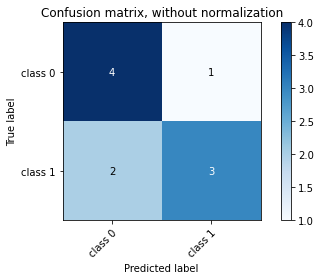

In [5]:
plot_confusion_matrix(y_true,y_pred,classes=['class 0','class 1'])
plt.show()

## Metrics derived from $C$
$C$ contains $n_{classes}^2$ elements but we need a single number metric to easily compare various models.

For two classes:


<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>


Some single number metrics derived from $C$:
- accuracy: fraction of data points correctly classified
   - $a = \sum_i C_{i,i} / \sum C$ = (TP + TN) / (TP + TN + FP + FN)
- recall: what fraction of the condition positive samples are true positives?
   - it measures the ability of the classifier to identify all positive samples
   - in binary classification: R = TP / (TP + FN)
- precision: what fraction of the predicted positive points are true positives?
   - it measures the ability of the classifier to not predict a negative sample to be positive
   - in binary classification: P = TP / (TP + FP)

<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>

A = (TP + TN) / (TP + TN + FP + FN) 

R = TP / (TP + FN) = TP / CP

P = TP / (TP + FP) = TP / PP

### The f_beta score
Weighted harmonic mean of P and R:
### <center> $f_{\beta} = (1 + \beta^2) \frac{P R}{\beta^2 P + R}$ </center>

If $\beta = 1$, we have the f1 score:
### <center> $f_{1} = 2 \frac{P R}{P + R}$ </center>

If $\beta < 1$, more weight to precision.

If $\beta > 1$, more weight to recall.



### The scores are a function of p_crit

In [18]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score

y_true = np.array([0,0,1,0,1,1,0,1,0,1]) # the true classification labels of the dataset
y_pred_proba = np.array([0.3, 0.7,  0.55, 0.12, 0.45, 0.89, 0.41, 0.02, 0.29, 0.85])

p_crit = 0.5

y_pred = np.zeros(len(y_pred_proba),dtype=int)
y_pred[y_pred_proba < p_crit] = 0
y_pred[y_pred_proba >= p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels
print('accuracy',accuracy_score(y_true,y_pred))
print('recall',recall_score(y_true,y_pred))
print('precision',precision_score(y_true,y_pred))
print('f1',fbeta_score(y_true,y_pred,1))

[0 0 1 0 1 1 0 1 0 1]
[0 1 1 0 0 1 0 0 0 1]
accuracy 0.7
recall 0.6
precision 0.75
f1 0.6666666666666665


# Module 2: Working with predicted probabilities in classification
### Learning objectives of this module:
- Summarize what the ROC and precision-recall curves and AUC are
- Review the logloss metric and its properties
- Calculate the value of each metric given a set’s target variable and predictions from an ML model
- Calculate the baseline of each metric given a set’s target variable
- Choose an appropriate evaluation metric given your ML problem

### The ROC curve
- Receiver Operating Characteristic
   - x axis: false positive rate (fpr = FP / (FP + TN))
   - y axis: true positive rate (R = TP / (TP + FN))
   - the curve shows fpr and R value pairs for various class 1 critical probabilities
- upper left corner: perfect predictor
- diagonal point: chance level predictions
- lower right corner: worst predictor

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
df = pd.read_csv('data/true_labels_pred_probs.csv')

y_true = df['y_true']
pred_prob_class1 = df['pred_prob_class1']

fpr = np.zeros(len(y_true))
tpr = np.zeros(len(y_true))

p_crits = np.sort(pred_prob_class1) # the sorted predicted probabilities serve as critical probabilities

for i in range(len(p_crits)):
    p_crit = p_crits[i]
    
    y_pred = np.zeros(len(y_true))
    y_pred[pred_prob_class1 < p_crit] = 0
    y_pred[pred_prob_class1 >= p_crit] = 1
    
    C = confusion_matrix(y_true,y_pred) 
    
    tpr[i] = C[1,1]/(C[1,0]+C[1,1])
    fpr[i] = C[0,1]/(C[0,0]+C[0,1])

# from sklearn.metrics import roc_curve
# # the roc_curve function performs the same calculation
# fpr,tpr,p_crits = roc_curve(y_true,pred_prob_class1)

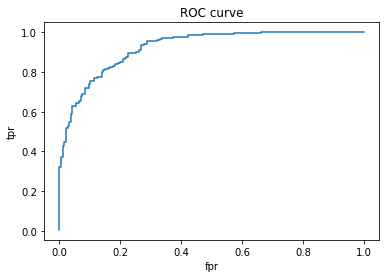

In [2]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## ROC AUC
- ROC is useful but it is not a single number metric
   - it cannot be directly used to compare various classification models
- summary statistics based on the ROC curve (for a complete list, see [here](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Further_interpretations))
- most commonly used metric is ROC AUC - ROC Area Under the Curve
   - AUC = 1 is a perfect classifier
   - AUC > 0.5 is above chance-level predictor
   - AUC = 0.5 is a chance-level classifier
   - AUC < 0.5 is a bad predictor
   - AUC = 0 classifies all points incorrectly

In [4]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_true,pred_prob_class1))

0.9236524315231854


## Precision-recall curve
- the drawback of ROC is that it uses TN, not good for imbalanced problems.
- the precision-recall curve doesn't use TN, ideal for imbalanced problems.

In [5]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score # the AUC of the P-R curve

p,r,p_crits = precision_recall_curve(y_true,pred_prob_class1)

print(average_precision_score(y_true,pred_prob_class1))

0.9315588971251673


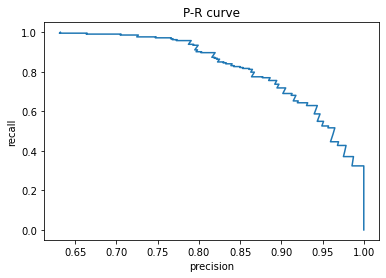

In [6]:
plt.plot(p,r)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('P-R curve')
plt.show()


## The logloss metric

### <center>$logloss = - \frac{1}{N}\sum (y_{true}\ln(p_{pred}) + (1-y_{true})(1-\ln(1-p_{pred})))$</center>
- $p_{pred}$ is the predicted probability of the **positive class**
- the predicted probabilities are not converted into predicted classes
- excellent choice if you need accurate probabilities (e.g., when it is expensive/costly to act due to limited resources so you need to rank your points based on probabilities)
- two scenarios:
   - y_true = 0 - left term disappears
   - y_true = 1 - right term disappears
- log(0) is undefined
   - $p_{pred}$ is replaced with $\max(\min(p,1-10^{-15}),10^{-15})$ to avoid this issue

### The extreme cases
- the classifier is confidently wrong
   - $p_{pred} = 10^{-15}$ for points in class 1
   - $p_{pred} = 1 - 10^{-15}$ for points in class 0
<center>$logloss = -\frac{1}{N}\sum \ln(10^{-15}) = -\ln(10^{-15})$</center>
<center> $logloss \sim  34.5  $</center>

- the classifier is correct
   - $p_{pred} = 10^{-15}$ for points in class 0
   - $p_{pred} = 1 - 10^{-15}$ for points in class 1
<center>$logloss = -\frac{1}{N}\sum (1-0)(1-\ln(1-10^{-15})) = 10^{-15}$ for class 0</center>
<center>$logloss = -\frac{1}{N}\sum 1*\ln(1-10^{-15}) = 10^{-15}$ for class 1</center>
<center>$logloss \sim 0$</center>



In [8]:
from sklearn.metrics import log_loss
print(log_loss(y_true,pred_prob_class1))
help(log_loss)

0.35015190545328556
Help on function log_loss in module sklearn.metrics._classification:

log_loss(y_true, y_pred, *, eps=1e-15, normalize=True, sample_weight=None, labels=None)
    Log loss, aka logistic loss or cross-entropy loss.
    
    This is the loss function used in (multinomial) logistic regression
    and extensions of it such as neural networks, defined as the negative
    log-likelihood of a logistic model that returns ``y_pred`` probabilities
    for its training data ``y_true``.
    The log loss is only defined for two or more labels.
    For a single sample with true label yt in {0,1} and
    estimated probability yp that yt = 1, the log loss is
    
        -log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))
    
    Read more in the :ref:`User Guide <log_loss>`.
    
    Parameters
    ----------
    y_true : array-like or label indicator matrix
        Ground truth (correct) labels for n_samples samples.
    
    y_pred : array-like of float, shape = (n_samples, n_c

## How should you choose a metric?

- What are the terms in the confusion matrix that you most (or least) care about?
    - In an imbalanced dataset, TNs are large so you should use a metric that doesn't include TN
    - no accuracy
    - f score is usually preferred if your dataset is imbalanced
- Will we act (intervene/apply treatment) on the model's prediction?
    - Is it cheap to act? (e.g., mass email)
       - we want to capture the largest fraction of the condition positive samples even if FPs will be large as a result
       - recall or fbeta with beta > 1 (f1.5 or f2 are often used)
    - Is it expensive to act? Do we have limited resources? Or treatment/action is costly?
       - we want to make sure that the resources are allocated the best way possible
       - want to make sure that a large fraction of the predicted positives are  true positives
       - precision or fbeta with beta < 1 (f0.5 is often used)

# Module 3: Regression metrics
### Learning objectives of this module:
- Outline metrics often used in regression (MSE, RMSE, MAE, R2 score)
- Calculate the value of each metric given a set’s target variable and predictions from an ML model
- Calculate the baseline of each metric given a set’s target variable
- Choose an appropriate evaluation metric given your ML problem

## Regression metrics
- the target variable is continuous
- the predicted values are also continuous
- regression metrics measure some type of difference between y (true values) and y' (predicted values)

### Mean Squared Error 

### <center>$MSE(y,y') = \frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2$</center>

#### The unit of MSE is not the same as the target variable.

### Root Mean Square Error

### <center>$RMSE(y,y') = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-y_i')^2}$</center>


### Mean Absolute Error

### <center>$MAE(y,y') = \frac{1}{n}\sum_{i=1}^{n}|y_i-y_i'|$</center>

#### Both RMSE and MAE have the same unit as the target variable.


## R2 score - coefficient of determination

### <center>$R^2(y,y') = 1 - \frac{\sum_{i=1}^{n}(y_i-y_i')^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$,</center>
<center>where $\bar{y}$ is the mean of $y$.</center>

- R2 = 1 is the perfect regression model ($y == y'$)
- R2 = 0 is as good as a constant model that always predicts the expected value of y ($\bar{y}$)
- R2 < 0 is a bad regression model

#### R2 is dimensionless.

In [9]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

- RMSE is not implemented in sklearn, but you can calculate it as `np.sqrt(mean_squared_error(y_true,y_pred))` or `mean_squared_error(y_true,y_pred, squared = False)`
- you can find more on regression metrics [here](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)